In [466]:
import pandas as pd
import matplotlib as plt
from functools import reduce
from sklearn.model_selection import train_test_split


In [534]:
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics

### Load Data

In [257]:
zhvi_data = pd.read_csv('/Users/philglazer/Desktop/zillow_data/Zip_Zhvi_SingleFamilyResidence.csv',encoding = "ISO-8859-1")

In [258]:
zhvi_rental_data = pd.read_csv('/Users/philglazer/Desktop/zillow_data/Zip_Zri_SingleFamilyResidenceRental.csv',encoding = "ISO-8859-1")

In [274]:
foreclosures_resales = pd.read_csv('/Users/philglazer/Desktop/zillow_data/SalesPrevForeclosed_Share_Zip.csv',encoding = "ISO-8859-1")

In [45]:
sale_price_data = pd.read_csv('/Users/philglazer/Desktop/zillow_data/Sale_Prices_Zip.csv')

In [46]:
sale_counts_data = pd.read_csv('/Users/philglazer/Desktop/zillow_data/Sale_Counts_Zip.csv')

In [47]:
median_listing_price_data = pd.read_csv('/Users/philglazer/Desktop/zillow_data/Zip_MedianListingPrice_AllHomes.csv',encoding = "ISO-8859-1")

In [48]:
median_listing_price_persqft_data = pd.read_csv('/Users/philglazer/Desktop/zillow_data/Zip_MedianListingPricePerSqft_AllHomes.csv',encoding = "ISO-8859-1")

In [49]:
percent_listings_price_reductions_data = pd.read_csv('/Users/philglazer/Desktop/zillow_data/Zip_PctOfListingsWithPriceReductions_AllHomes.csv',encoding = "ISO-8859-1")

In [50]:
median_percent_price_reductions_data = pd.read_csv('/Users/philglazer/Desktop/zillow_data/Zip_MedianPctOfPriceReduction_AllHomes.csv',encoding = "ISO-8859-1")

In [51]:
monthly_listings_allhomes_data = pd.read_csv('/Users/philglazer/Desktop/zillow_data/MonthlyListings_NSA_AllHomes_Zip.csv',encoding = "ISO-8859-1")

In [52]:
new_monthly_listings_nsa_allhomes_data = pd.read_csv('/Users/philglazer/Desktop/zillow_data/NewMonthlyListings_NSA_AllHomes_Zip.csv',encoding = "ISO-8859-1")

In [53]:
median_daily_listings_nsa_allhomes_data = pd.read_csv('/Users/philglazer/Desktop/zillow_data/MedianDailyListings_NSA_AllHomes_Zip.csv',encoding = "ISO-8859-1")

In [54]:
price_to_rent_ratio_data = pd.read_csv('/Users/philglazer/Desktop/zillow_data/Zip_PriceToRentRatio_AllHomes.csv',encoding = "ISO-8859-1")

#### List of data available

In [275]:
data_sets = [zhvi_data, zhvi_rental_data, foreclosures_resales, sale_price_data, sale_counts_data, median_listing_price_data, median_listing_price_persqft_data,
            percent_listings_price_reductions_data, median_percent_price_reductions_data, monthly_listings_allhomes_data,
            new_monthly_listings_nsa_allhomes_data, median_daily_listings_nsa_allhomes_data, price_to_rent_ratio_data]

In [276]:
# removed, mostly empty:'new_monthly_listings_nsa':new_monthly_listings_nsa_allhomes_data, 
# removed, mostly empty:'median_listing_price_persqft':median_listing_price_persqft_data,
# removed, mostly empty:'sale_price':sale_price_data, 
# removed, mostly empty:'sale_counts':sale_counts_data,



data_sets_dict = {
    'zhvi':zhvi_data,
    'zhvi_rental':zhvi_rental_data,
    'foreclose_resales':foreclosures_resales,
    'median_listing_price':median_listing_price_data, 
    'percent_listing_price_reductions':percent_listings_price_reductions_data, 
    'median_percent_price_reductions':median_percent_price_reductions_data, 
    'monthly_listings_allhomes':monthly_listings_allhomes_data,
    'median_daily_listings':median_daily_listings_nsa_allhomes_data, 
    'price_to_rent_ratio':price_to_rent_ratio_data
}

In [545]:
top_thirty_zip_codes = list(zhvi_data[zhvi_data['SizeRank']<30]['RegionName'])

In [553]:
zhvi_data

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,337200.0,338200.0,339000.0,...,1041900,1044100,1047700,1049600,1048500,1048500,1052700,1057800,1067100,1076100
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,...,336800,338100,338500,337200,336200,336100,335300,334000,333400,333200
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,502900.0,504900.0,506300.0,...,1320100,1320200,1319100,1318200,1319600,1322700,1328100,1334600,1340900,1342900
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,95400.0,95600.0,95800.0,...,177400,178100,178700,179600,180300,180900,181900,183200,182900,181500
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,77300.0,77300.0,77300.0,...,123700,124600,125700,126400,126800,127500,128100,128600,128800,128800
5,91733,77084,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,6,95000.0,95200.0,95400.0,...,167500,168800,169700,170900,172400,173800,175500,177400,177500,175900
6,61807,10467,New York,NY,New York-Newark-Jersey City,Bronx County,7,151900.0,151800.0,151800.0,...,429300,433000,434000,434800,438000,442700,446400,450400,455000,458300
7,62037,11226,New York,NY,New York-Newark-Jersey City,Kings County,8,161800.0,162200.0,162500.0,...,1061600,1093500,1115700,1126900,1119900,1093800,1058200,1032400,1035700,1056900
8,84640,60640,Chicago,IL,Chicago-Naperville-Elgin,Cook County,9,218500.0,218500.0,218500.0,...,760700,756900,755900,748900,745600,749500,753500,756800,776100,799400
9,97564,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,10,767700.0,772800.0,778000.0,...,3960500,3973400,3986000,4005300,4001400,4010700,4013400,3970000,3942000,3951300


### Helper Functions

In [569]:
# get the row corresponding to a given zipcode from the sale_price_data DataFrame

col_names = ['RegionID','RegionName','StateName','SizeRank','RegionType',
            'City','County','State','Metro','CountyName']

def prepare_df_for_zip(zip_code, data_set):
    data = data_set[data_set['RegionName']==zip_code]
    for c in col_names:
        if c in data.columns:
            data.drop([c],axis=1,inplace=True)
    data = data.transpose()
    data['Date'] = data.index
    return data[data['Date']>='2013-01'] #.add_prefix('hello')
    

In [570]:
def join_data_available(zip_code, data_sets):
    master_df = pd.DataFrame()
    df_list = []
    for k in data_sets_dict.keys():
        data = prepare_df_for_zip(zip_code, data_sets_dict[k])#.add_prefix(k)
        for i in range(50):
                data.rename(columns={i:k}, inplace=True)
        #data.rename(columns={0:k}, inplace=True)
        #data.rename(columns={1:k}, inplace=True)
        df_list.append(data)
        
        
    df_final = reduce(lambda left,right: pd.merge(left,right,on='Date'), df_list)
    return df_final
    
    #df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'],how='outer'), data_frames)


In [585]:
join_data_available(28269, data_sets_dict)

/Users/philglazer/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,zhvi,Date,zhvi_rental,foreclose_resales,median_listing_price,percent_listing_price_reductions,median_percent_price_reductions,monthly_listings_allhomes,median_daily_listings,price_to_rent_ratio
0,134700.0,2013-01,1186.0,0.1154,149000.0,11.509434,3.403361,424.0,298.0,9.82
1,135700.0,2013-02,1189.0,0.0714,149888.0,8.620690,2.745463,372.0,282.0,9.85
2,137100.0,2013-03,1193.0,0.1047,151000.0,9.790210,2.893780,403.0,296.0,9.88
3,138400.0,2013-04,1201.0,0.0800,155000.0,8.972268,3.240070,418.0,298.0,9.86
4,139600.0,2013-05,1207.0,0.0752,155000.0,10.210697,3.009915,451.0,311.0,9.88
5,140700.0,2013-06,1214.0,0.0687,155000.0,10.658307,2.894737,441.0,320.0,9.90
6,141500.0,2013-07,1218.0,0.0952,157900.0,11.935484,3.304023,470.0,330.0,9.94
7,142200.0,2013-08,1220.0,0.1111,159900.0,12.458472,2.914286,441.0,345.0,9.96
8,143100.0,2013-09,1220.0,0.0891,159900.0,15.847861,2.691511,487.0,366.0,9.96
9,143800.0,2013-10,1221.0,0.1154,163250.0,15.981735,2.779322,524.0,396.0,10.01


In [594]:
def run_full_model(zip_code,start_date,end_date):
    data = join_data_available(zip_code, data_sets_dict).set_index('Date')
    
    data['zhvi_+3mo'] = data['zhvi'].shift(3)
    data['zhvi_+6mo'] = data['zhvi'].shift(6)
    data['zhvi_+9mo'] = data['zhvi'].shift(9)
    data['zhvi_+12mo'] = data['zhvi'].shift(12)

    data['pct_change_3mo'] = (data['zhvi'] - data['zhvi_+3mo'])/data['zhvi_+3mo']
    data['pct_change_6mo'] = (data['zhvi'] - data['zhvi_+6mo'])/data['zhvi_+6mo']
    data['pct_change_9mo'] = (data['zhvi'] - data['zhvi_+9mo'])/data['zhvi_+9mo']
    data['pct_change_12mo'] = (data['zhvi'] - data['zhvi_+12mo'])/data['zhvi_+12mo']

    data['positive_3mo_change'] = data['pct_change_3mo'].apply(lambda x: 1 if x>0 else 0)
    data['positive_6mo_change'] = data['pct_change_6mo'].apply(lambda x: 1 if x>0 else 0)
    data['positive_9mo_change'] = data['pct_change_9mo'].apply(lambda x: 1 if x>0 else 0)
    data['positive_12mo_change'] = data['pct_change_12mo'].apply(lambda x: 1 if x>0 else 0)
    
    # some NaN values after this date
    data = data[data.index<'2018-10']
    
    # make this an input variable
    features = data[['zhvi',
     'zhvi_rental',
     'foreclose_resales',
     'median_listing_price',
     'percent_listing_price_reductions',
     'median_percent_price_reductions',
     'monthly_listings_allhomes',
     'median_daily_listings',
     'price_to_rent_ratio']]
    
    # make this an input variable
    target = data['positive_12mo_change']
    
    # adjust to deal with date range
    features = features #[features.index>'2015-12']
    target = target #[36:]
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=20)
    
    clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)
    
    #fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=2)
    
    #print("AUC:",metrics.auc(fpr, tpr))
    
    features['zhvi'].plot()
    
    print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
    
    return pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

/Users/philglazer/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



F1 Score: 0.9575352184047837


Predicted Result,0,1
Actual Result,,
0,6,0
1,1,16


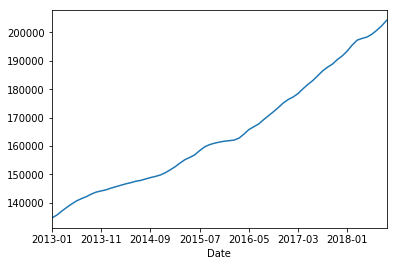

In [595]:
run_full_model(28269,'2015-01','2018-11')

## Model Fitting

In [499]:
data = data[data.index<'2018-10']

In [500]:
data

,zhvi,zhvi_rental,foreclose_resales,median_listing_price,percent_listing_price_reductions,median_percent_price_reductions,monthly_listings_allhomes,median_daily_listings,price_to_rent_ratio,zhvi_+3mo,...,zhvi_+9mo,zhvi_+12mo,pct_change_3mo,pct_change_6mo,pct_change_9mo,pct_change_12mo,positive_3mo_change,positive_6mo_change,positive_9mo_change,positive_12mo_change
Date,,,,,,,,,,,,,,,,,,,,,
2013-01,113000.0,1009.0,0.0208,131000.0,11.069418,3.944444,466.0,381.0,9.06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2013-02,113300.0,998.0,0.0698,134900.0,12.104283,2.950311,450.0,380.0,9.11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2013-03,113600.0,992.0,0.0317,133000.0,14.081996,3.225806,459.0,386.0,9.21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2013-04,113500.0,991.0,0.0328,136727.5,9.964413,3.225911,461.0,376.0,9.22,113000.0,...,NaN,NaN,0.004425,NaN,NaN,NaN,1,0,0,0
2013-05,113300.0,993.0,0.0127,135500.0,15.505226,3.105327,490.0,384.0,9.21,113300.0,...,NaN,NaN,0.000000,NaN,NaN,NaN,0,0,0,0
2013-06,113000.0,997.0,0.0328,133000.0,13.705584,3.046392,477.0,397.0,9.19,113600.0,...,NaN,NaN,-0.005282,NaN,NaN,NaN,0,0,0,0
2013-07,112900.0,1007.0,0.0833,132000.0,18.018018,3.100775,481.0,391.0,9.11,113500.0,...,NaN,NaN,-0.005286,-0.000885,NaN,NaN,0,0,0,0
2013-08,112900.0,1019.0,0.0143,134000.0,18.738739,4.086739,463.0,393.0,9.07,113300.0,...,NaN,NaN,-0.003530,-0.003530,NaN,NaN,0,0,0,0
2013-09,112800.0,1030.0,0.0175,134350.0,16.054159,3.569261,446.0,378.0,9.11,113000.0,...,NaN,NaN,-0.001770,-0.007042,NaN,NaN,0,0,0,0


In [501]:
target = data['pct_change_12mo']

In [502]:
features = data[['zhvi',
 'zhvi_rental',
 'foreclose_resales',
 'median_listing_price',
 'percent_listing_price_reductions',
 'median_percent_price_reductions',
 'monthly_listings_allhomes',
 'median_daily_listings',
 'price_to_rent_ratio']]

In [503]:
features = features[features.index>'2013-12']
target = target[12:]

In [504]:
reg = LinearRegression().fit(features, target)

In [505]:
reg.score(features, target)

0.8195747445645287

### Predict Positive/Negative Return at Intervals

In [506]:
target = data['positive_6mo_change'][12:]

In [507]:
features = features[features.index>'2013-12']

In [508]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [509]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [510]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [511]:
y_pred = clf.predict(X_test)

In [512]:
print(clf.feature_importances_)

[0.30934345 0.03598868 0.03770422 0.02808219 0.15709206 0.20794899
 0.10521044 0.03759537 0.08103461]


In [513]:
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,1,5
1,0,9
